# Predicitve maintenance 101

author: Junyoung Park at KAIST

<br/>
<center><img src="img/jet_engine.jpg" width="400" height="400"><em>Jet engine on test</em></center>

Predictive maintence techniques are designed to help determine the condition of in-service equipment in order to estimate when maintenance should be performed. Such techniques can help bussines to cut down the cost for regular inspection for the eqiupment or schedule and prepare the replacement for the expected failure. 

In this project, we will use jet engine run-to-fail dataset that contains multiple failure trajectories of jet-engine with 21 sensors and 3 controllable settings. Our primary goal of the project is building an algorithm that predicts failure timing under the given histroical sensor observations and controllable inputs. For simplicity of the problem, we will assume the data itself is determnisitic.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Data description

Jet engine run-to-fail dataset contains 100 realization of jet engine failures. Each trajectory of failure were measured with __evenly spaced__ observation spans. 
* __id__ and __cycle__ shows the id and cycles of experiments.
* __setting i__ (i = 1,2,3) indicates __controllable__ operational conditions of each experiment at the specific cycle
* __s i__ (i = 1,2, ... 21) are sensor measurements. 
* __ttf__ (=time-to-failure) denotes how many cycles remain before failure.
* __broken__ is a binary indicator which shows the jet enginer is broken.

In this project, we will assume that the state of jet engine is fully inferreable from the trajcetory of __setting i__ and __s i__.

In [2]:
df = pd.read_csv('./data/project/jet_engine_dataset.csv')
df.head(5)

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004       100  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003       100  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003       100  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000       100  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002       100  518.67  642.37  1582.85  1406.22   

      s5  ...      s14     s15   s16  s17   s18  s19    s20      s21  ttf  \
0  14.62  ...  8138.62  8.4195  0.03  392  2388  100  39.06  23.4190  191   
1  14.62  ...  8131.49  8.4318  0.03  392  2388  100  39.00  23.4236  190   
2  14.62  ...  8133.23  8.4178  0.03  390  2388  100  38.95  23.3442  189   
3  14.62  ...  8133.83  8.3682  0.03  392  2388  100  38.88  23.3739  188   
4  14.62  ...  8133.80  8.4294  0.03  393  2388  100  38.90  23.4044  187   

   broken  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 28 columns]

In [3]:
experiment_indices = df['id'].unique()
print("Number of experiemnts: {} ".format(len(experiment_indices)))

Number of experiemnts: 100 


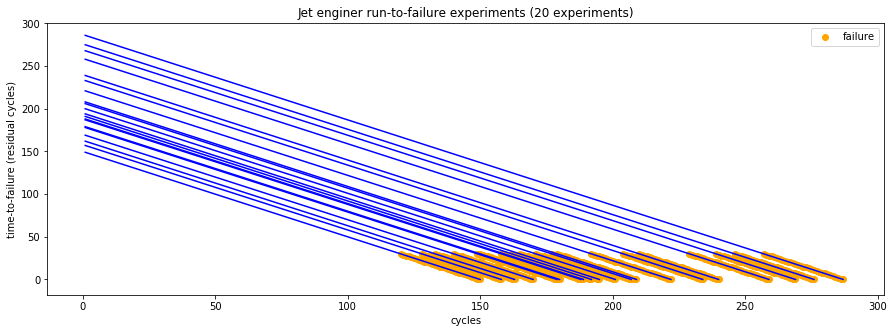

In [4]:
visualize_n = 20

fig, ax = plt.subplots(1,1, figsize=(15,5))
for i in experiment_indices[:visualize_n]:
    id_cond = df['id'] == i
    brk_cond = df['broken'] == 1
    _plot = ax.plot(df[id_cond]['cycle'], df[id_cond]['ttf'], color='blue')
    _scatter = ax.scatter(df[id_cond & brk_cond]['cycle'], df[id_cond & brk_cond]['ttf'], c='orange', label='broken')
ax.set_title('Jet enginer run-to-failure experiments ({} experiments)'.format(visualize_n))
ax.set_xlabel('cycles')
ax.set_ylabel('time-to-failure (residual cycles)')
ax.legend((_scatter,), ('failure',))
plt.show()

## Task description

Build an algorithm that predicts when the given jet engine would fail. i.e. predicts remaining useful life time __(RUL)__ of the jet engine. 

Things you can earn addtional credits:
* Build an algorithm that infer the state of jet engine from sensor measurements only. one possible way is to train classifiation algorithm that classifies whether the jet engine has failure or not.

* Perform __ROC__ (Reciever Operating Characteristic) analysis with the trained classifier.

## Scoring guide

We will __not measure__ the performance of prediction algorithms. instead our main concern would be:

* Proper data preparation were done? (if necessary, data cleasing and feature engineering)
* Prelimnary analysis on data were done? (qualitative, quantitative either methods would be fine)
* The logical explanation on model selection including architectures of neural network
* Selecting properly designed loss functions
* Training result anaylsis
* whether the trained model is __practically beneficial__? 

__practically beneficial__ means whether you can deploy your model in practice. For instance, at certain moment you cannot get the future sensor observations. However, you can presume that controllable inputs are depending on your hand. Therefore, your model cannot use the future sernsor observations when they decide the  time-to-failure at runtime but the model can use future trajectory of controllable inputs.